In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

In [4]:
#define Paths and fileNames
model_name = 'anchor'
cutoff_kind = '4'

### Reading Data

In [ ]:
file = open(f'/nfshome/winkelmann/ARL/save/{model_name}TS_data/cutoffs_{}_{model_name}_fit','r') #edit for plotting over right cutoff
file.readline()
lines = file.readlines()
file.close()
fit_methods = ['ardr-lambda', 'ardr-lineScan', 'rfe', 'lasso', 'least-squares', 'bayesian-ridge', 'elasticnet', 'omp', 'ridge', 'split-bregman']
data = {}
for fit_method in fit_methods:
    data[fit_method] = {'cutoff':[],'validation':[],'train':[],'BIC':[],'number':[],'nonzero':[]}
    
for line in lines:
    line = line.replace(' ', '')
    values = line.split(',')
    if len(values) > 8:
        print(values[8] + ',' + str(values[0:8]))
        continue
    data[values[0]]['cutoff'].append(float(values[1]))
    data[values[0]]['validation'].append(float(values[2]))
    data[values[0]]['train'].append(float(values[3]))
    data[values[0]]['BIC'].append(float(values[4]))
    data[values[0]]['number'].append(float(values[5]))
    data[values[0]]['nonzero'].append(float(values[6]))

FileNotFoundError: [Errno 2] No such file or directory: '/nfshome/winkelmann/ARL/save/anchorTS_data/cutoffs_3_anchor_fit'

In [5]:
#for files with all cutoffs
file = open(f'/nfshome/winkelmann/ARL/save/{model_name}TS_data/cutoffs_{cutoff_kind}_{model_name}_fitting_data', 'r')  #edit for plotting over right cutoff
file.readline()
lines = file.readlines()
file.close()
fit_methods = ['ardr-lambda', 'ardr-lineScan', 'rfe', 'lasso', 'least-squares', 'bayesian-ridge', 'elasticnet', 'omp',
               'ridge', 'split-bregman']
data = {}
lower_cutoff_groups = []
for line in lines:
    line = line.replace(' ', '').replace('\t','')
    line = line.split(',')
    if not line[1] in lower_cutoff_groups:
        lower_cutoff_groups.append(line[1])

for fit_method in fit_methods:
    data[fit_method] = {'cutoff': [], 'validation': [], 'train': [], 'BIC': [], 'number': [], 'nonzero': []}

for line in lines:
    line = line.replace(' ', '').replace('\t','').replace('\n','')
    line = line.split(',')
    if len(line) > 12:
        print(line[12] + ',' + str(line[0:12]))
        continue
    data[line[0]]['cutoff'].append(float(line[4]))
    data[line[0]]['validation'].append(float(line[5]))
    data[line[0]]['train'].append(float(line[6]))
    data[line[0]]['BIC'].append(float(line[7]))
    data[line[0]]['number'].append(float(line[8]))
    data[line[0]]['nonzero'].append(float(line[9]))

In [7]:
#for files with diffrent lower cutoffs
file = open('/nfshome/winkelmann/ARL/save/titanTS_data/cutoffs_4_jochen_fit', 'r')  #edit for plotting over right cutoff
file.readline()
lines = file.readlines()
file.close()
fit_methods = ['ardr-lambda', 'ardr-lineScan', 'rfe', 'lasso', 'least-squares', 'bayesian-ridge', 'elasticnet', 'omp',
               'ridge', 'split-bregman']
data = {}

lower_cutoff_groups = []
for line in lines:
    line = line.replace(' ', '').replace('\t','')
    line = line.split(',')
    if not line[1] in lower_cutoff_groups:
        lower_cutoff_groups.append(line[1])


for cutoff_group in lower_cutoff_groups:
    data[cutoff_group] = {}
    for fit_method in fit_methods:
        data[cutoff_group][fit_method] = {'cutoff': [], 'validation': [], 'train': [], 'BIC': [], 'number': [], 'nonzero': []}

for line in lines:
    line = line.replace(' ', '').replace('\t','').replace('\n','')
    line = line.split(',')
    if len(line) > 12:
        print(line[12] + ',' + str(line[0:12]))
        continue
    data[line[1]][line[0]]['cutoff'].append(float(line[2]))
    data[line[1]][line[0]]['validation'].append(float(line[3]))
    data[line[1]][line[0]]['train'].append(float(line[4]))
    data[line[1]][line[0]]['BIC'].append(float(line[5]))
    data[line[1]][line[0]]['number'].append(float(line[6]))
    data[line[1]][line[0]]['nonzero'].append(float(line[7]))

### as PDF

In [ ]:
pdf = PdfPages(f'/nfshome/winkelmann/ARL/save/{model_name}_data/cutoff_{cutoff_group}_{model_name}_plot.pdf')
conv = 1000

for fit_method in fit_methods:
    df = pd.DataFrame(data[fit_method])

    fig, axes = plt.subplots(figsize=(4, 5.2), dpi=120, sharex=True, nrows=3)

    fig.suptitle('%s min at: %s with RMSE: %.4s' %(fit_method, df.cutoff[df.validation.idxmin()], df.validation.min()*conv))

    ax = axes[0]
    ax.plot(df.cutoff, conv * df.validation, '-o', label='validation')
    ax.plot(df.cutoff, conv * df.train, '--s', label='train')
    ax.set_ylabel(r'RMSE ($\frac{meV}{atom}$)')
    ax.set_xlabel('cutoff (Å)')
    ax.legend()

    ax = axes[1]
    ax.plot(df.cutoff, 1e-3 * df.BIC, '-o')
    ax.set_ylabel(r'BIC ($\times 10^{3}$)')

    ax = axes[2]
    ax.plot(df.cutoff, df.number, '--s', label='Total')
    ax.plot(df.cutoff, df.nonzero, '-o', label='Nonzero')
    ax.set_xlabel('2nd order cutoff (Å)')
    ax.set_ylabel('Number of parameters')
    ax.legend()

    fig.tight_layout()
    fig.subplots_adjust(hspace=0)
    fig.align_ylabels(axes)
    pdf.savefig(figure=fig, bbox_inches='tight')
pdf.close()

In [ ]:
#with cutoff subgroups
pdf = PdfPages('/nfshome/winkelmann/ARL/tmp/comparing_cutoff_quartett_jochen.pdf')
conv = 1000

for fit_method in fit_methods:
    for cutoff_group in lower_cutoff_groups:
        df = pd.DataFrame(data[cutoff_group][fit_method])
        
        fig, axes = plt.subplots(figsize=(4, 5.2), dpi=120, sharex=True, nrows=3)
        
        fig.suptitle('%s with %s as cutoff 3; min at: %s with %s' %(fit_method, cutoff_group, df.cutoff[df.validation.idxmin()], df.validation.min() * conv))
        
        ax = axes[0]
        ax.plot(df.cutoff, conv * df.validation, '-o', label='validation')
        ax.plot(df.cutoff, conv * df.train, '--s', label='train')
        ax.set_ylabel(r'RMSE ($\frac{meV}{atom}$)')
    ax.set_xlabel('cutoff (Å)')
        ax.legend()
        
        ax = axes[1]
        ax.plot(df.cutoff, 1e-3 * df.BIC, '-o')
        ax.set_ylabel(r'BIC ($\times 10^{3}$)')
        
        ax = axes[2]
        ax.plot(df.cutoff, df.number, '--s', label='Total')
        ax.plot(df.cutoff, df.nonzero, '-o', label='Nonzero')
        ax.set_xlabel('2nd order cutoff (Å)')
        ax.set_ylabel('Number of parameters')
        ax.legend()
        
        fig.tight_layout()
        fig.subplots_adjust(hspace=0)
        fig.align_ylabels(axes)
        
        pdf.savefig(figure=fig, bbox_inches='tight')
pdf.close()

### for PNG's

ValueError: attempt to get argmin of an empty sequence

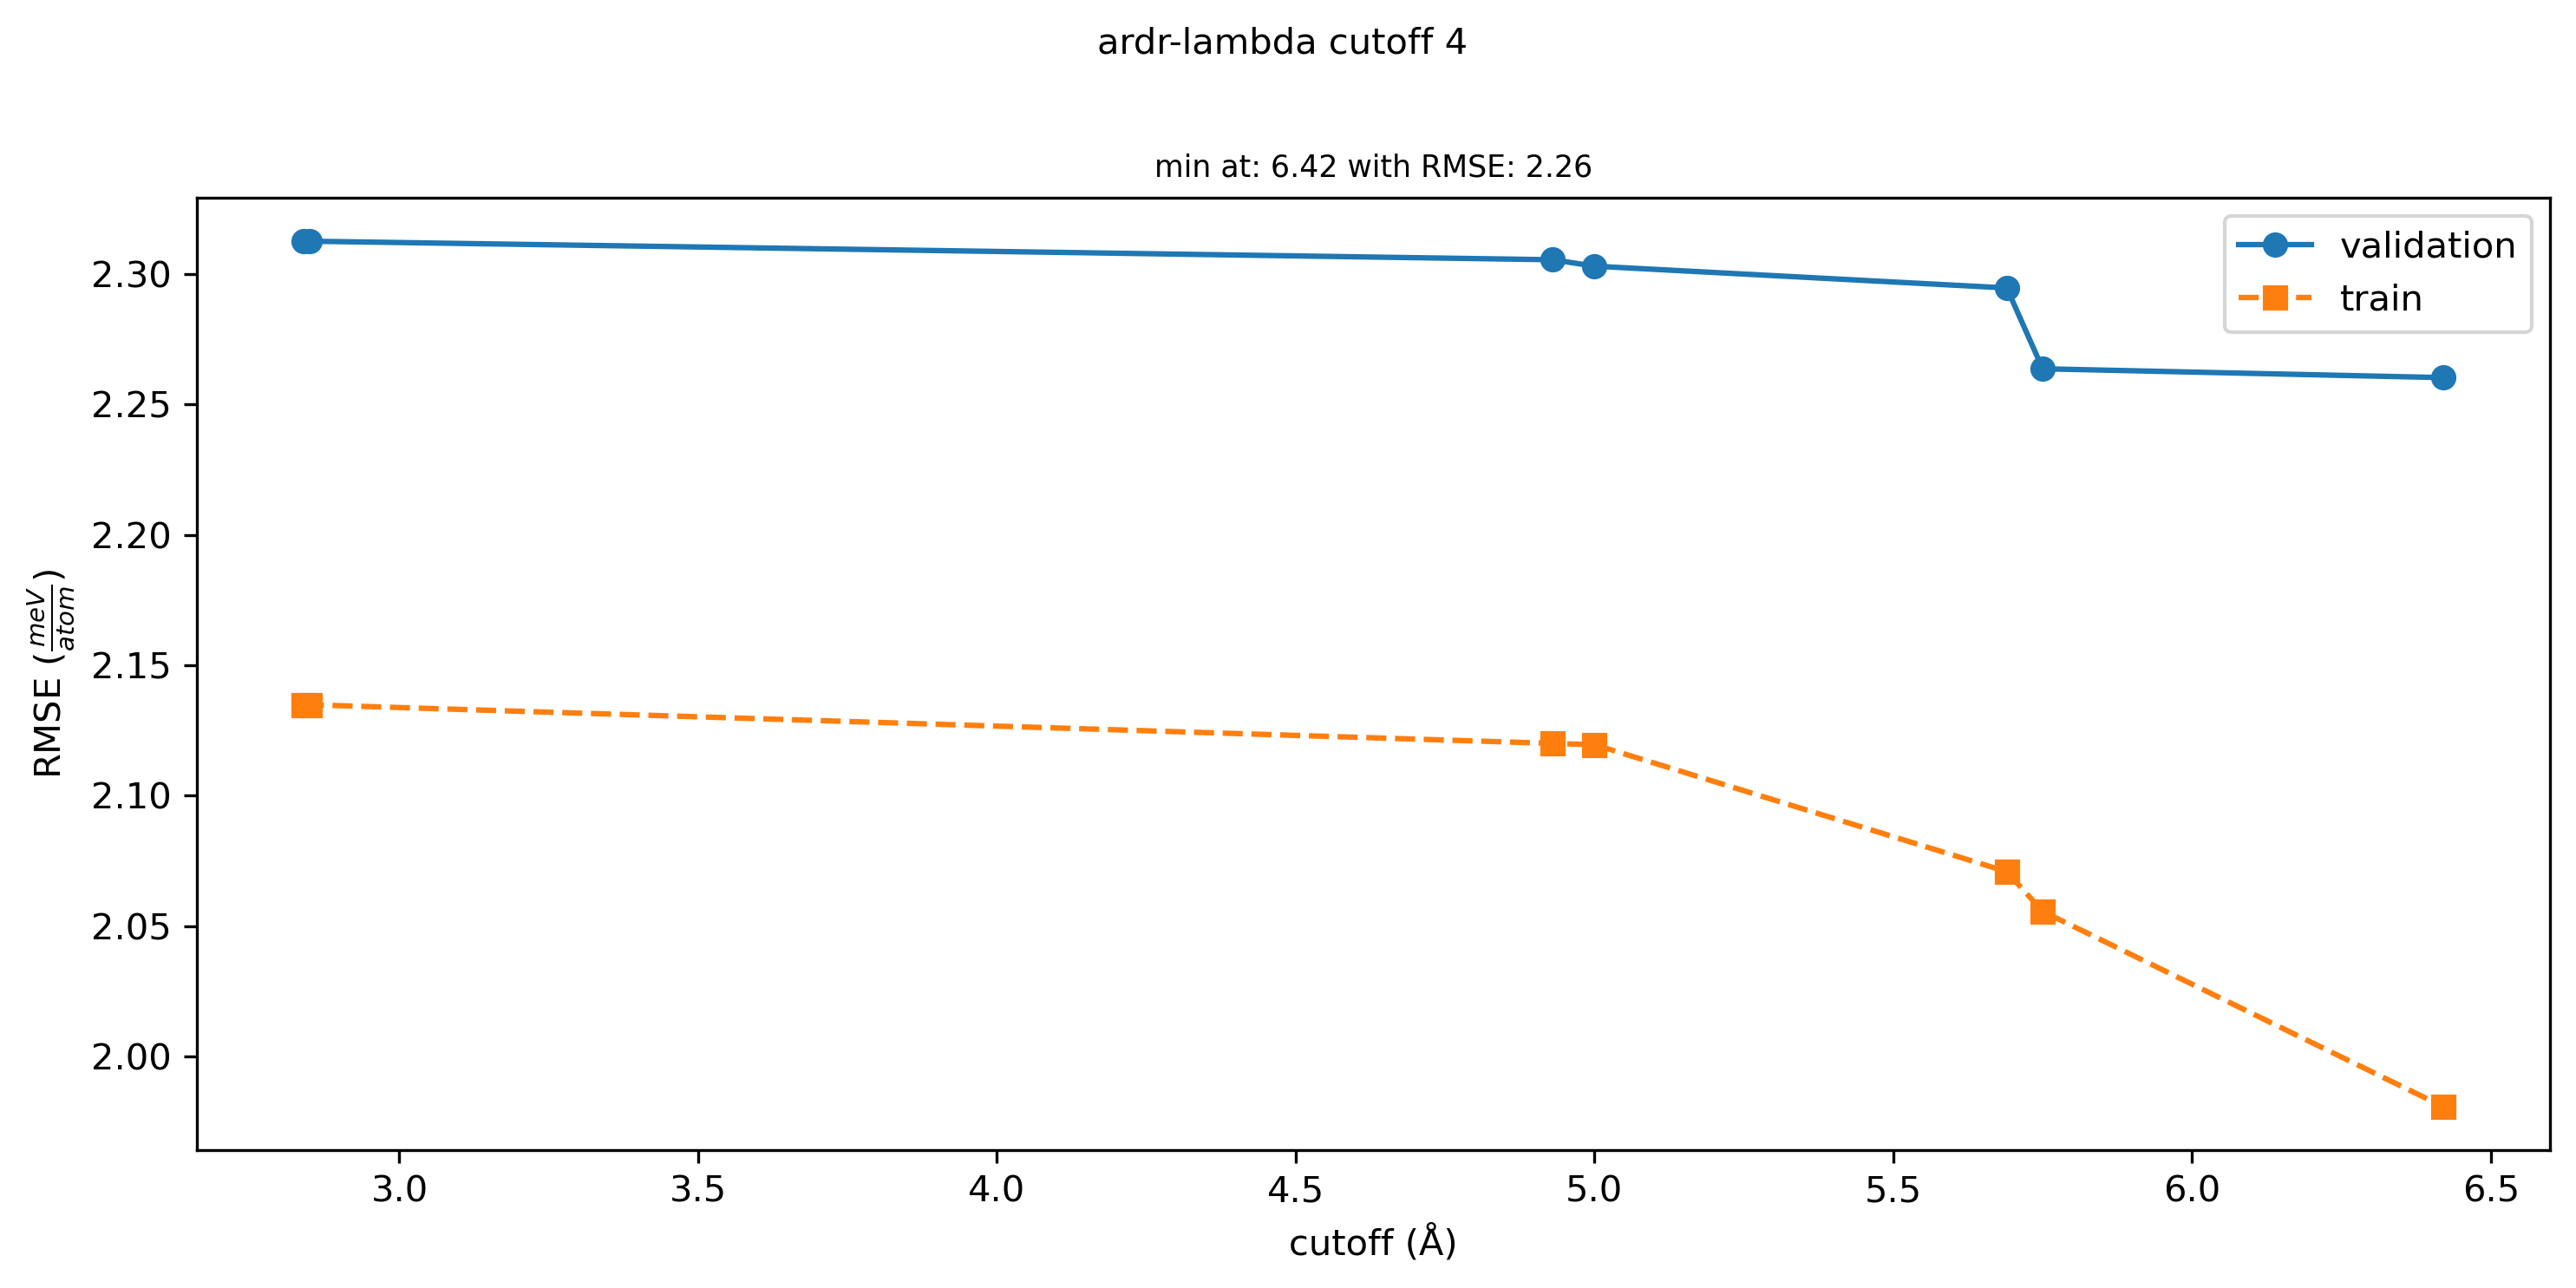

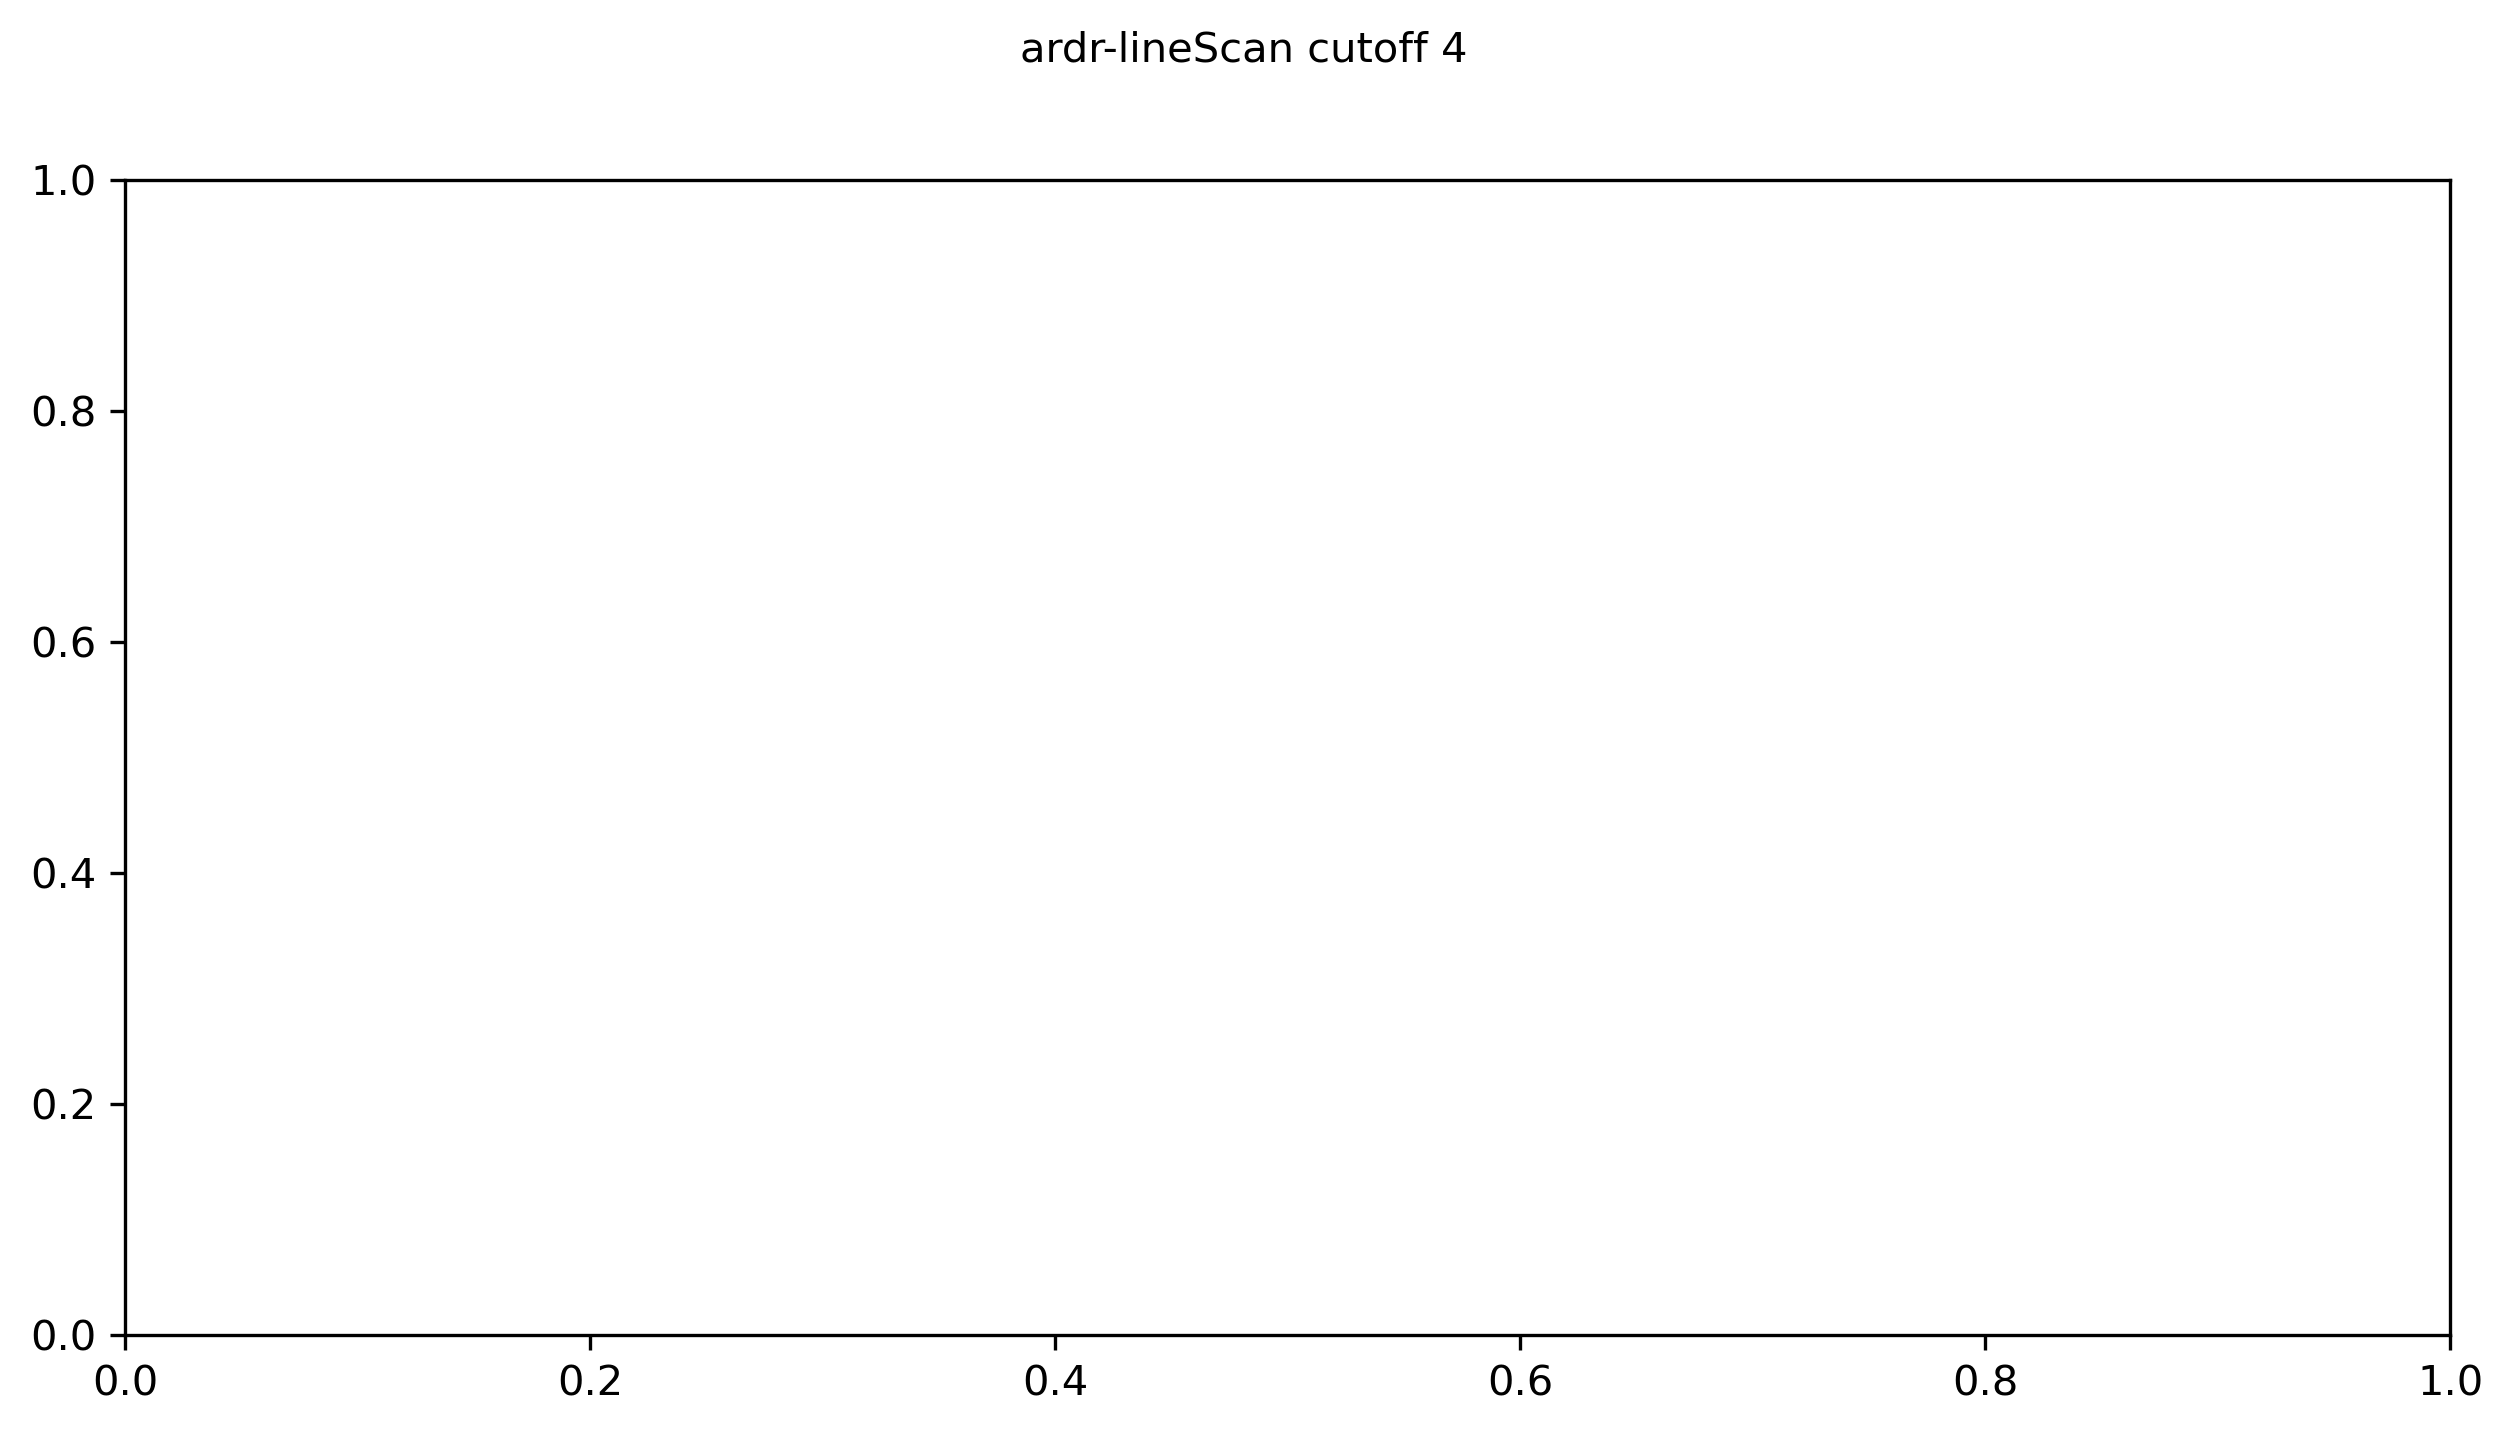

In [6]:
conv = 1000

for fit_method in fit_methods:
    df = pd.DataFrame(data[fit_method])

    fig, axes = plt.subplots(figsize=(10, 5), dpi=300, sharex=True, nrows=1)
    ax = axes

    fig.suptitle(f'{fit_method} cutoff {cutoff_kind} \n ', size='medium')
    ax.set_title(f'min at: {df.cutoff[df.validation.idxmin()]} with RMSE: {str(df.validation.min()*conv)[:4]}', size='small')

    ax.plot(df.cutoff, conv * df.validation, '-o', label='validation')
    ax.plot(df.cutoff, conv * df.train, '--s', label='train')
    ax.set_ylabel(r'RMSE ($\frac{meV}{atom}$)')
    ax.set_xlabel('cutoff (Å)')
    ax.legend()

    fig.tight_layout()
    fig.subplots_adjust(hspace=0)
    fig.align_ylabels(axes)

    fig.savefig(f'/nfshome/winkelmann/ARL/save/{model_name}TS_data/cutoff_{model_name}TS_png_plots/plot_cutoff_{cutoff_kind}_%s.png' %(fit_method))


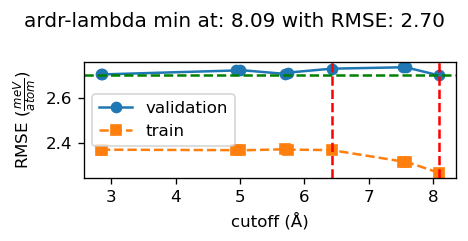

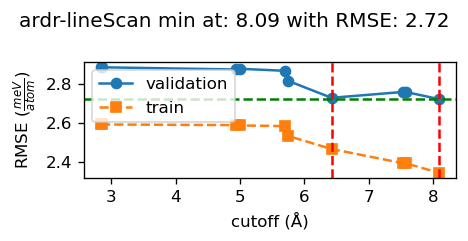

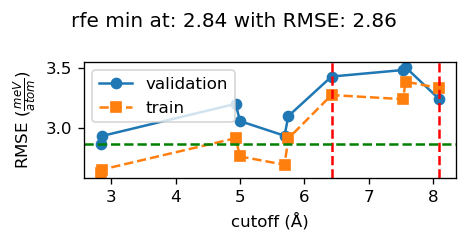

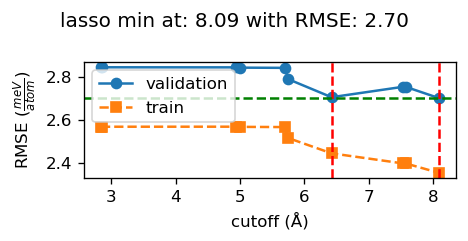

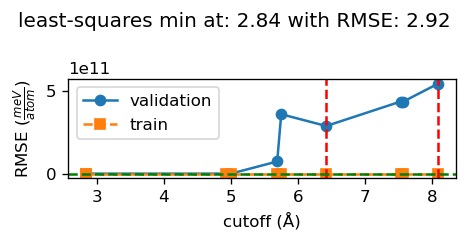

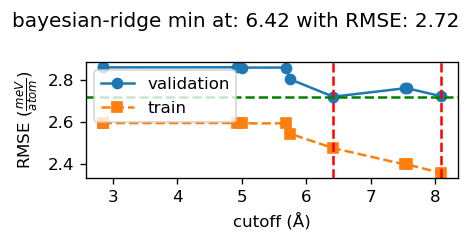

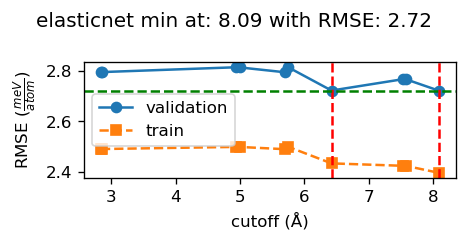

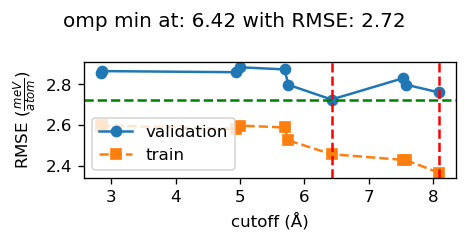

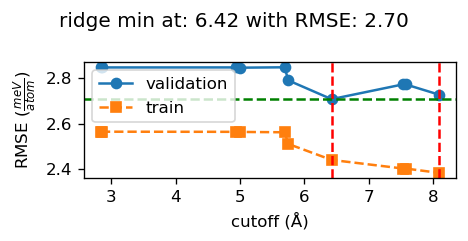

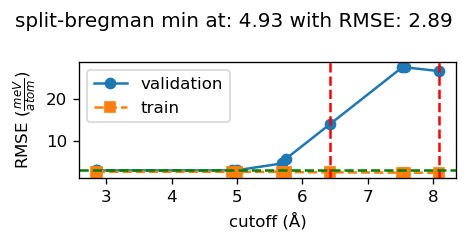

In [9]:
### with extra lines at specified values
conv = 1000

for fit_method in fit_methods:
    df = pd.DataFrame(data[fit_method])

    fig, axes = plt.subplots(figsize=(4, 2), dpi=120, sharex=True, nrows=1)

    fig.suptitle('%s min at: %s with RMSE: %.4s' %(fit_method, df.cutoff[df.validation.idxmin()], df.validation.min()*conv))

    ax = axes
    ax.plot(df.cutoff, conv * df.validation, '-o', label='validation')
    ax.plot(df.cutoff, conv * df.train, '--s', label='train')
    ax.set_ylabel(r'RMSE ($\frac{meV}{atom}$)')
    ax.set_xlabel('cutoff (Å)')
    ax.legend()

    # extra lines
    ax.axvline(x=6.42, color='r', linestyle='--', label='c2')
    ax.axvline(x=8.09, color='r', linestyle='--', label='c2')
    ax.axhline(y=df.validation.min()*conv, color='g', linestyle='--')


    fig.tight_layout()
    fig.subplots_adjust(hspace=0)
    fig.align_ylabels(axes)

    fig.savefig(
        '/nfshome/winkelmann/ARL/save/titanTS_data/cutoff_titanTS_png_plots/plot_cutoff_3_%s_extra-lines.png' % (fit_method))

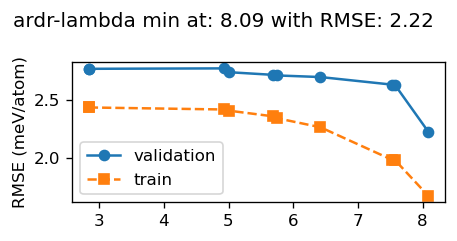

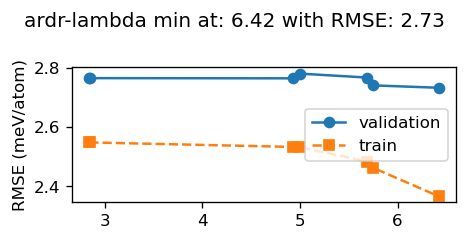

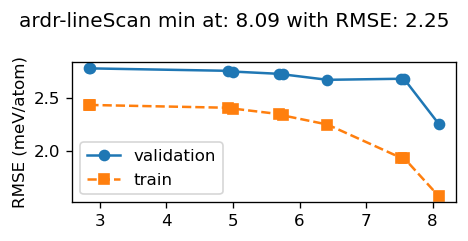

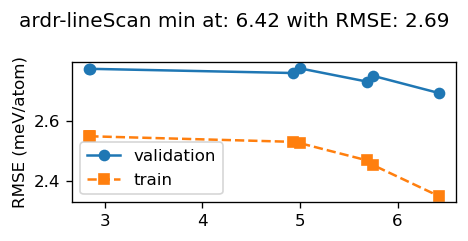

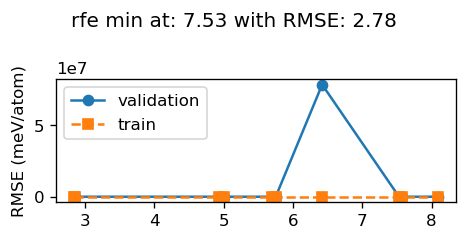

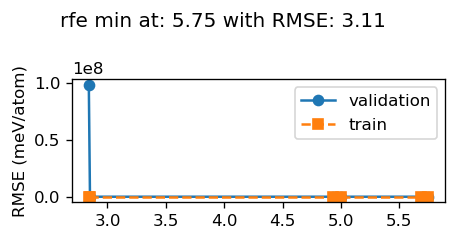

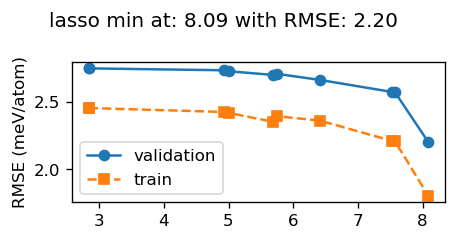

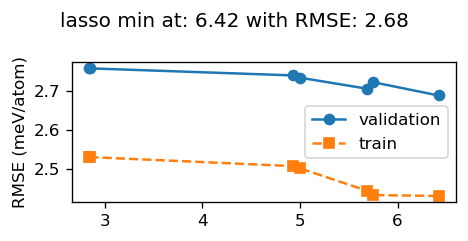

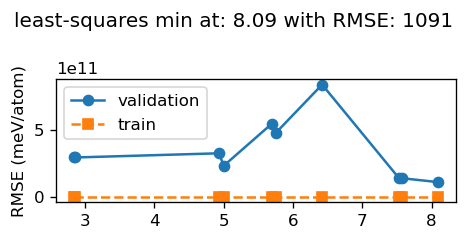

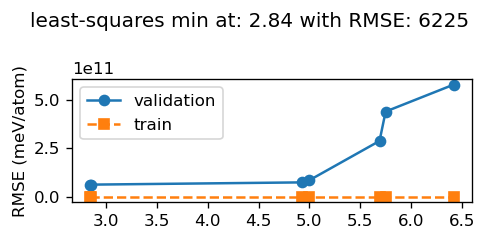

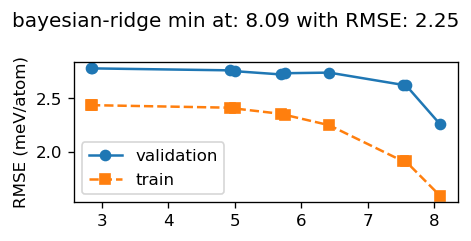

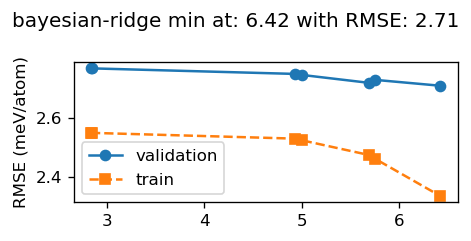

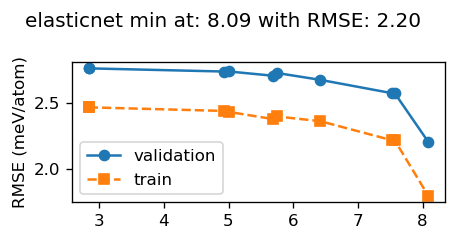

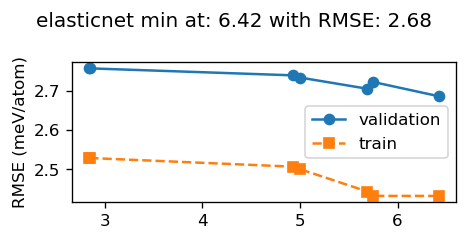

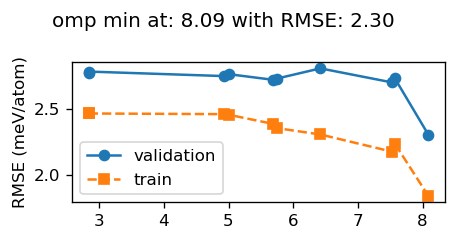

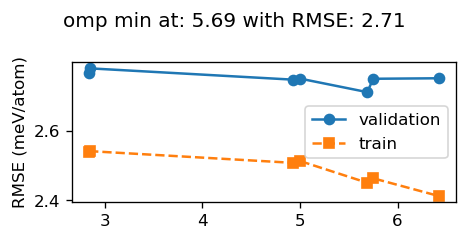

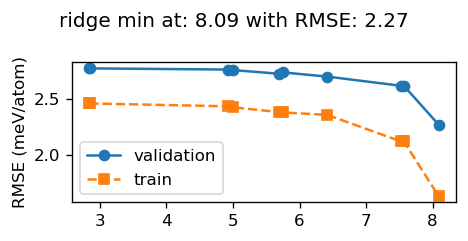

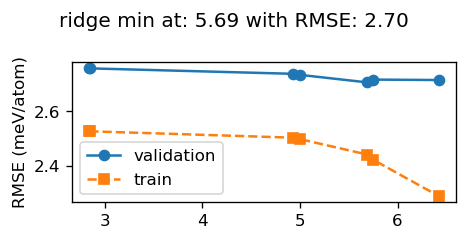

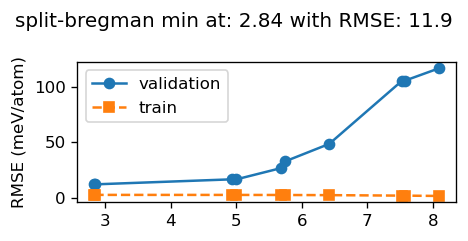

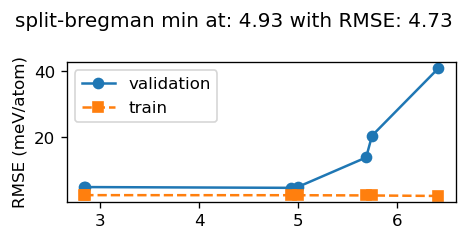

In [8]:
#with cutoff subgroups
conv = 1000

for fit_method in fit_methods:
    for cutoff_kind in lower_cutoff_groups:
        df = pd.DataFrame(data[cutoff_kind][fit_method])

        fig, axes = plt.subplots(figsize=(4, 2), dpi=120, sharex=True, nrows=1)

        fig.suptitle('%s with %s as cutoff 3; min at: %s with %s' % (
            fit_method, cutoff_kind, df.cutoff[df.validation.idxmin()], df.validation.min() * conv))

        ax = axes
        ax.plot(df.cutoff, conv * df.validation, '-o', label='validation')
        ax.plot(df.cutoff, conv * df.train, '--s', label='train')
        ax.set_ylabel(r'RMSE ($\frac{meV}{atom}$)')
        ax.set_xlabel('cutoff (Å)')
        ax.legend()

        fig.tight_layout()
        fig.subplots_adjust(hspace=0)
        fig.align_ylabels(axes)

        fig.savefig('/nfshome/winkelmann/ARL/save/titanTS_data/cutoff_titanTS_png_plots/plot_cutoff_4_%s_c3-%s.png' %(fit_method, cutoff_kind))

# Plot for TS cutoff data (ab c3)

In [ ]:
file = open('/nfshome/winkelmann/ARL/tmp/cutoffs_2_jochen_fit', 'r')  #edit for plotting over right cutoff
file.readline()
lines = file.readlines()
file.close()
fit_methods = ['ardr-lambda', 'ardr-lineScan', 'rfe', 'lasso', 'least-squares', 'bayesian-ridge', 'elasticnet', 'omp',
               'ridge', 'split-bregman']
data = {}
    
for fit_method in fit_methods:
    data[fit_method] = {}
    for cutoff_kind in lower_cutoff_groups:
        data[fit_method][cutoff_kind] = {'cutoff': [], 'validation': [], 'train': [], 'BIC': [], 'number': [], 'nonzero': []}

for line in lines:
    line = line.replace(' ', '').replace('\t','').replace('\n','')
    line = line.split(',')
    if len(line) > 9:
        print(line[8] + ',' + str(line[0:8]))
        continue
    data[line[0]][line[1]]['cutoff'].append(float(line[2]))
    data[line[0]][line[1]]['validation'].append(float(line[3]))
    data[line[0]][line[1]]['train'].append(float(line[4]))
    data[line[0]][line[1]]['BIC'].append(float(line[5]))
    data[line[0]][line[1]]['number'].append(float(line[6]))
    data[line[0]][line[1]]['nonzero'].append(float(line[7]))